# Simple Linear Regression

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
options(repr.plot.width = 6, repr.plot.height = 3)

## 3. Now it's your turn

## Student Performance

In this WPA, you will analyze data from a study on student performance in two classes: math and Portugese. These data come from the UCI Machine Learning database at http://archive.ics.uci.edu/ml/datasets/Student+Performance#

**Task A**

1. Download the data from the website (by clicking on `Data Folder`, and unzipping the downloaded `student` folder on your computer). We are going to use one of the files contained in the `student` folder: `student-mat.csv`. Load it in R as `student_math`. Inspect the dataset first.

2. Create a regression object called `model_fit_math_1` predicting first period grade (G1) based on age. How do you interpret the relationship between age and first period grade? Respond in terms of both model parameters fit and overall model fit. Were the model assumption violated? Respond using the plots we have seen in class. Finally, make a scatterplot with the regression line to illustrate such relationship as we have seen in previous assignments.

3. Create a regression object called `model_fit_math_2` predicting first period grade (G1) based on absences. How do you interpret the relationship between absences and G1? Respond in terms of both model parameters fit and overall model fit. Were the model assumption violated? Respond using the plots we have seen in class. Finally, make a scatterplot with the regression line to illustrate such relationship as we have seen in previous assignments.

4. Create a regression object called `model_fit_math_3` predicting first period grade (G1) based on school support. How do you interpret the relationship between school support and G1? Respond in terms of both model parameters fit and overall model fit. Were the model assumption violated? Respond using the plots we have seen in class. Finally, make a scatterplot with the regression line to illustrate such relationship as we have seen in previous assignments. 

5. Given that school support is a nominal variable with 2 levels, how can you tell from the output which direction the effect is? How does this relate to the way the dataset has stored the levels of the school support factor?

5. From the regression, what would be your best guess for the first period grade for a student with no school support? What about for a student with school support?

**A1. Download the data from the website (by clicking on Data Folder, and unzipping the downloaded student folder on your computer). We are going to use one of the files contained in the student folder: student-mat.csv. Load it in R as student_math. Inspect the dataset first.**

In [3]:
student_math = read_csv2('~/git/r-course2020/data/student-mat.csv')

ℹ Using ',' as decimal and '.' as grouping mark. Use `read_delim()` for more control.


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)
ℹ Use `spec()` for the full column specifications.




In [4]:
glimpse(student_math)

Rows: 395
Columns: 33
$ school     <chr> "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP", "GP",…
$ sex        <chr> "F", "F", "F", "F", "F", "M", "M", "F", "M", "M", "F", "F",…
$ age        <dbl> 18, 17, 15, 15, 16, 16, 16, 17, 15, 15, 15, 15, 15, 15, 15,…
$ address    <chr> "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U",…
$ famsize    <chr> "GT3", "GT3", "LE3", "GT3", "GT3", "LE3", "LE3", "GT3", "LE…
$ Pstatus    <chr> "A", "T", "T", "T", "T", "T", "T", "A", "A", "T", "T", "T",…
$ Medu       <dbl> 4, 1, 1, 4, 3, 4, 2, 4, 3, 3, 4, 2, 4, 4, 2, 4, 4, 3, 3, 4,…
$ Fedu       <dbl> 4, 1, 1, 2, 3, 3, 2, 4, 2, 4, 4, 1, 4, 3, 2, 4, 4, 3, 2, 3,…
$ Mjob       <chr> "at_home", "at_home", "at_home", "health", "other", "servic…
$ Fjob       <chr> "teacher", "other", "other", "services", "other", "other", …
$ reason     <chr> "course", "course", "other", "home", "home", "reputation", …
$ guardian   <chr> "mother", "father", "mother", "mother", "father", "mother",…
$ traveltime <dbl>

In [5]:
head(student_math)

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


**A2. Create a regression object called model_fit_math_1 predicting first period grade (G1) based on age. How do you interpret the relationship between age and first period grade? Respond in terms of both model parameters fit and overall model fit. Were the model assumption violated? Respond using the plots we have seen in class. Finally, make a scatterplot with the regression line to illustrate such relationship as we have seen in previous assignments.**

In [6]:
model_fit_math_1 = lm(G1 ~ age, data = student_math)
summary(model_fit_math_1)

# looks like there is no relationship with age
# the age coefficient is not significant, as well as the F-test, meaning that the intercept model is better than the intercept+age model


Call:
lm(formula = G1 ~ age, data = student_math)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6915 -2.7749 -0.1916  2.3085  8.3085 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.6919     2.1926   6.245  1.1e-09 ***
age          -0.1667     0.1309  -1.273    0.204    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.317 on 393 degrees of freedom
Multiple R-squared:  0.004106,	Adjusted R-squared:  0.001572 
F-statistic:  1.62 on 1 and 393 DF,  p-value: 0.2038


`geom_smooth()` using formula 'y ~ x'



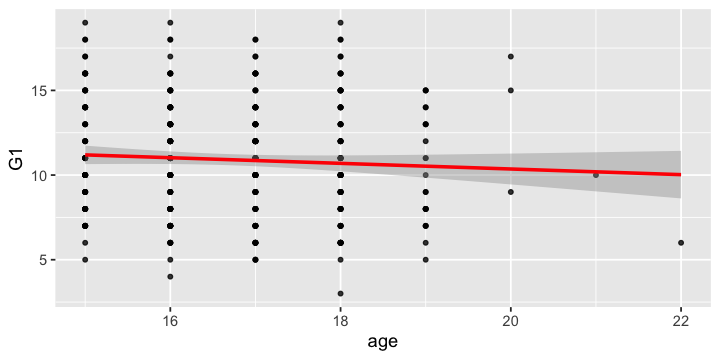

In [7]:
ggplot(data = student_math, mapping = aes(x = age, y = G1)) + 
    geom_point(alpha = 0.8, size= 1) +
    geom_smooth(method = lm, color='red')

In [8]:
# Obtain standardised residuals:
res_stu = rstudent(model = model_fit_math_1)
# Obtain model's predictions:
pred = model_fit_math_1$fitted.values

model_checks = data.frame(pred = pred, res_stu = res_stu)
model_checks = as_tibble(model_checks)

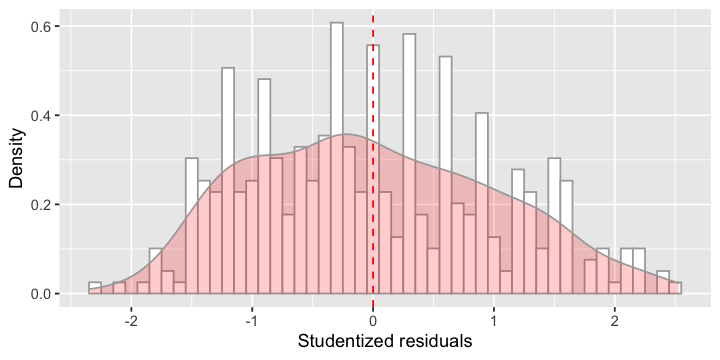

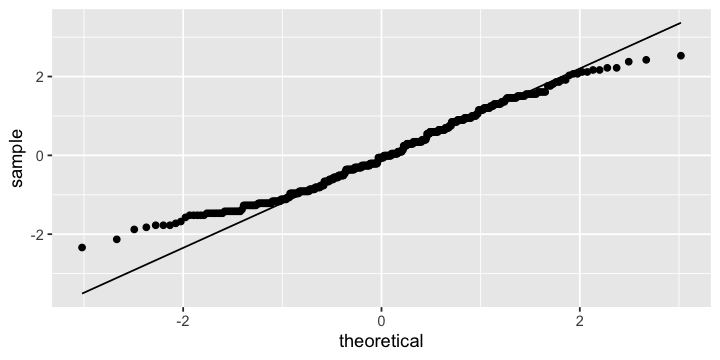

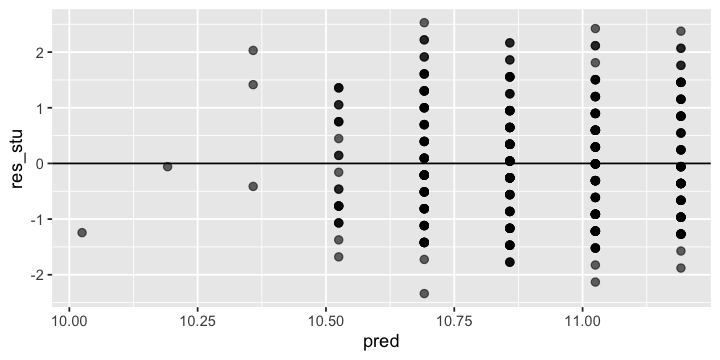

In [9]:
ggplot(data = model_checks, mapping = aes(x = res_stu)) + 
    geom_histogram(aes(y=..density..), binwidth=.1, colour="darkgrey", fill="white") + # Note: add aes(y=..density..) to have density instead of frequencies
    labs(x = 'Studentized residuals', y='Density') + 
    geom_density(alpha=.2, fill="red", colour="darkgrey")  + # Overlay with transparent density plot
    geom_vline(aes(xintercept=mean(res_stu)), color="red", linetype="dashed", size=.5) # Add mean residuals

ggplot(model_checks, mapping = aes(sample = res_stu)) +
    stat_qq() + 
    stat_qq_line()

ggplot(data = model_checks, mapping = aes(x = pred, y = res_stu)) + 
    geom_point(alpha = 0.6, size= 2) + 
    geom_hline(yintercept=0)

You can also use a more formal test for normality:

In [10]:
shapiro.test(model_checks$res_stu)


	Shapiro-Wilk normality test

data:  model_checks$res_stu
W = 0.98114, p-value = 4.999e-05


This test shows that we can reject the null hypothesis that the residuals came from a normal distribution.

See [here](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) for more info.

And you can also use a more formal test for heteroskedacity:

In [14]:
install.packages('lmtest')
install.packages('zoo')


The downloaded binary packages are in
	/var/folders/zy/hm8tbx3j7jn6skbfk75x0ll00000gp/T//RtmpkTqwFW/downloaded_packages

The downloaded binary packages are in
	/var/folders/zy/hm8tbx3j7jn6skbfk75x0ll00000gp/T//RtmpkTqwFW/downloaded_packages


In [15]:
library(lmtest)

In [16]:
bptest(model_fit_math_1)


	studentized Breusch-Pagan test

data:  model_fit_math_1
BP = 0.37268, df = 1, p-value = 0.5415


This test shows that we cannot reject the null that the variance of the residuals is constant, thus heteroskedacity is not present. 

See [here](https://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_test) for more info.

**A3. Create a regression object called model_fit_math_2 predicting first period grade (G1) based on absences. How do you interpret the relationship between absences and G1? Respond in terms of both model parameters fit and overall model fit. Were the model assumption violated? Respond using the plots we have seen in class. Finally, make a scatterplot with the regression line to illustrate such relationship as we have seen in previous assignments.**

In [17]:
model_fit_math_2 = lm(G1 ~ absences, data = student_math)
summary(model_fit_math_2)

# looks like there is no relationship with absences
# the absences coefficient is not significant, as well as the F-test, meaning that the intercept model is better than the intercept+absences model


Call:
lm(formula = G1 ~ absences, data = student_math)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8794 -2.9115  0.0177  2.2363  8.0692 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.98227    0.20539  53.470   <2e-16 ***
absences    -0.01286    0.02091  -0.615    0.539    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.322 on 393 degrees of freedom
Multiple R-squared:  0.0009612,	Adjusted R-squared:  -0.001581 
F-statistic: 0.3781 on 1 and 393 DF,  p-value: 0.539


`geom_smooth()` using formula 'y ~ x'



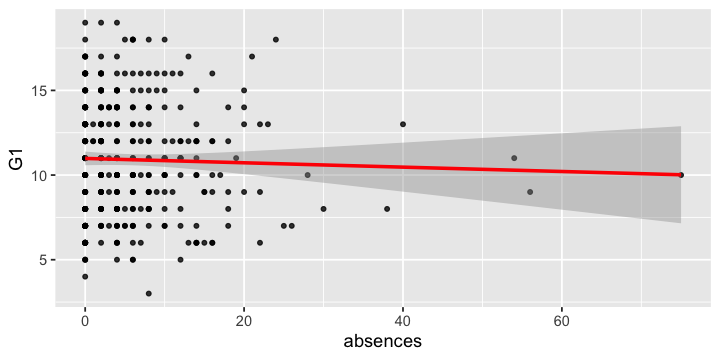

In [18]:
ggplot(data = student_math, mapping = aes(x = absences, y = G1)) + 
    geom_point(alpha = 0.8, size= 1) +
    geom_smooth(method = lm, color='red')

In [19]:
# Obtain standardised residuals:
res_stu = rstudent(model = model_fit_math_2)
# Obtain model's predictions:
pred = model_fit_math_2$fitted.values

model_checks = data.frame(pred = pred, res_stu = res_stu)
model_checks = as_tibble(model_checks)

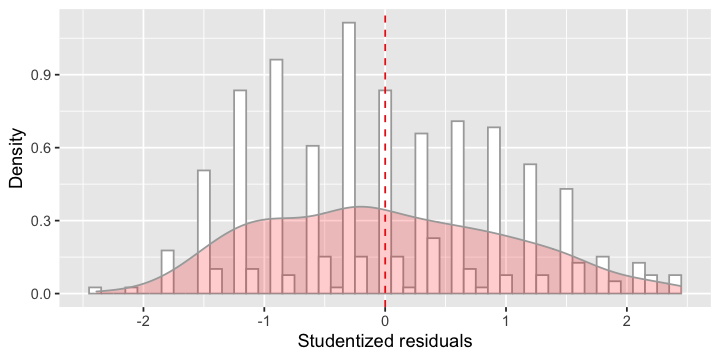

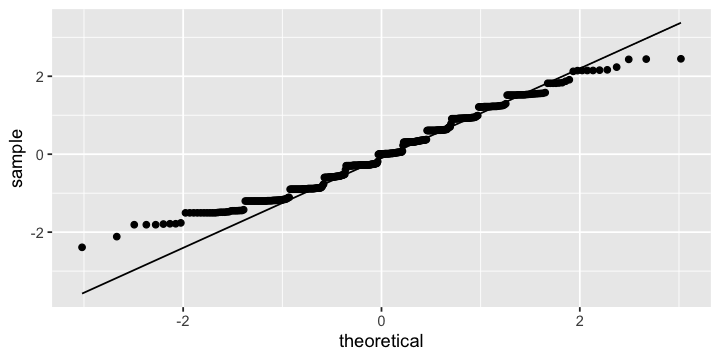

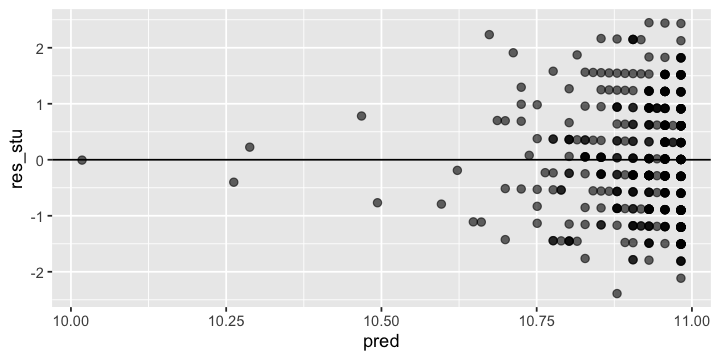

In [20]:
ggplot(data = model_checks, mapping = aes(x = res_stu)) + 
    geom_histogram(aes(y=..density..), binwidth=.1, colour="darkgrey", fill="white") + # Note: add aes(y=..density..) to have density instead of frequencies
    labs(x = 'Studentized residuals', y='Density') + 
    geom_density(alpha=.2, fill="red", colour="darkgrey")  + # Overlay with transparent density plot
    geom_vline(aes(xintercept=mean(res_stu)), color="red", linetype="dashed", size=.5) # Add mean residuals

ggplot(model_checks, mapping = aes(sample = res_stu)) +
    stat_qq() + 
    stat_qq_line()

ggplot(data = model_checks, mapping = aes(x = pred, y = res_stu)) + 
    geom_point(alpha = 0.6, size= 2) + 
    geom_hline(yintercept=0)

In [21]:
shapiro.test(model_checks$res_stu)

bptest(model_fit_math_2)


	Shapiro-Wilk normality test

data:  model_checks$res_stu
W = 0.97877, p-value = 1.512e-05



	studentized Breusch-Pagan test

data:  model_fit_math_2
BP = 1.4807, df = 1, p-value = 0.2237


**A4. Create a regression object called model_fit_math_3 predicting first period grade (G1) based on school support. How do you interpret the relationship between school support and G1? Respond in terms of both model parameters fit and overall model fit. Were the model assumption violated? Respond using the plots we have seen in class. Finally, make a scatterplot with the regression line to illustrate such relationship as we have seen in previous assignments.**

In [22]:
model_fit_math_3 = lm(G1 ~ schoolsup, data = student_math)
summary(model_fit_math_3)

# looks like there is a relationship with absences
# the absences coefficient is significant, as well as the F-test, meaning that the schoolsup+intercept model is better than the intercept model


Call:
lm(formula = G1 ~ schoolsup, data = student_math)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1802 -2.1802 -0.1802  2.8198  7.8198 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   11.1802     0.1751  63.854  < 2e-16 ***
schoolsupyes  -2.1018     0.4873  -4.313 2.04e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.247 on 393 degrees of freedom
Multiple R-squared:  0.0452,	Adjusted R-squared:  0.04277 
F-statistic: 18.61 on 1 and 393 DF,  p-value: 2.036e-05


In [23]:
student_math = mutate(student_math,
                      schoolsup_bin = recode(schoolsup, "yes" = 1, "no" = 0))

In [24]:
distinct(student_math, schoolsup, schoolsup_bin)

schoolsup,schoolsup_bin
<chr>,<dbl>
yes,1
no,0


`geom_smooth()` using formula 'y ~ x'



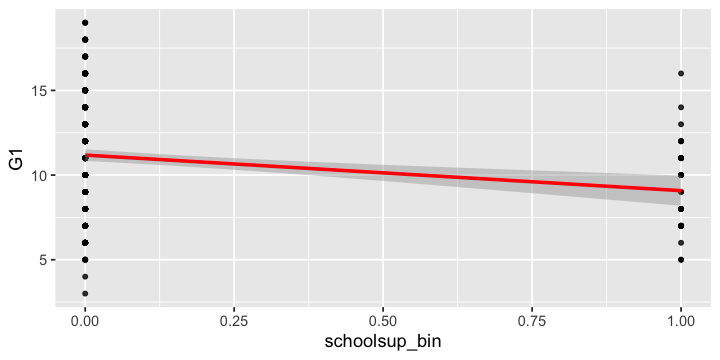

In [25]:
# To make the plot "work" I created the dummy variable schoolsup_bin

ggplot(data = student_math, mapping = aes(x = schoolsup_bin, y = G1)) + 
    geom_point(alpha = 0.8, size= 1) +
    geom_smooth(method = lm, color='red')

In [26]:
# Note that the result is the same using the dummy variable:

model_fit_math_3 = lm(G1 ~ schoolsup_bin, data = student_math)
summary(model_fit_math_3)


Call:
lm(formula = G1 ~ schoolsup_bin, data = student_math)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1802 -2.1802 -0.1802  2.8198  7.8198 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    11.1802     0.1751  63.854  < 2e-16 ***
schoolsup_bin  -2.1018     0.4873  -4.313 2.04e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.247 on 393 degrees of freedom
Multiple R-squared:  0.0452,	Adjusted R-squared:  0.04277 
F-statistic: 18.61 on 1 and 393 DF,  p-value: 2.036e-05


In [27]:
# Obtain standardised residuals:
res_stu = rstudent(model = model_fit_math_3)
# Obtain model's predictions:
pred = model_fit_math_3$fitted.values

model_checks = data.frame(pred = pred, res_stu = res_stu)
model_checks = as_tibble(model_checks)

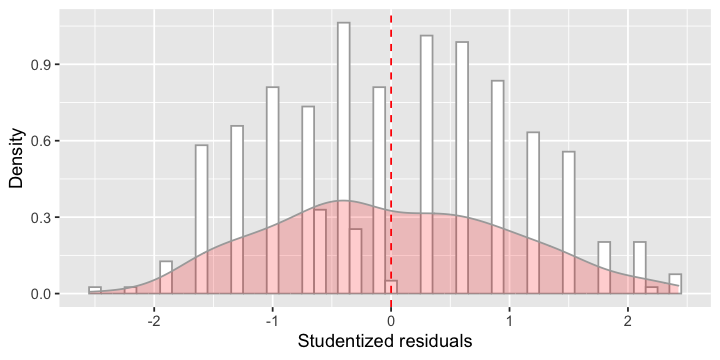

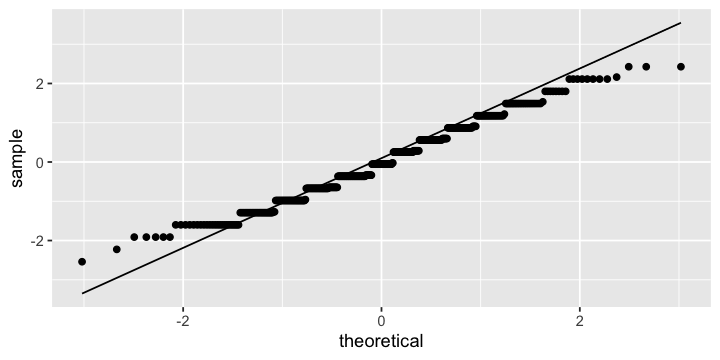

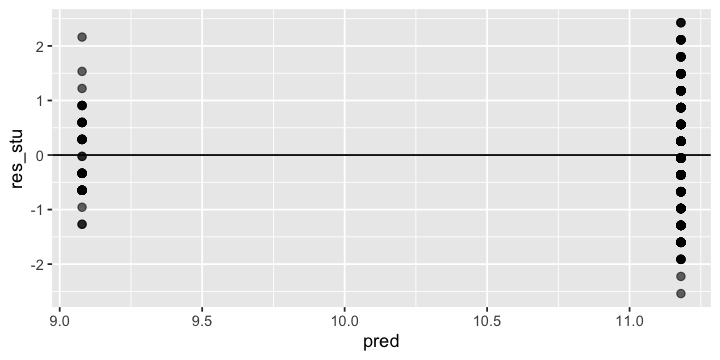

In [28]:
ggplot(data = model_checks, mapping = aes(x = res_stu)) + 
    geom_histogram(aes(y=..density..), binwidth=.1, colour="darkgrey", fill="white") + # Note: add aes(y=..density..) to have density instead of frequencies
    labs(x = 'Studentized residuals', y='Density') + 
    geom_density(alpha=.2, fill="red", colour="darkgrey")  + # Overlay with transparent density plot
    geom_vline(aes(xintercept=mean(res_stu)), color="red", linetype="dashed", size=.5) # Add mean residuals

ggplot(model_checks, mapping = aes(sample = res_stu)) +
    stat_qq() + 
    stat_qq_line()

ggplot(data = model_checks, mapping = aes(x = pred, y = res_stu)) + 
    geom_point(alpha = 0.6, size= 2) + 
    geom_hline(yintercept=0)

In [29]:
shapiro.test(model_checks$res_stu)

bptest(model_fit_math_3)


	Shapiro-Wilk normality test

data:  model_checks$res_stu
W = 0.98203, p-value = 7.983e-05



	studentized Breusch-Pagan test

data:  model_fit_math_3
BP = 10.851, df = 1, p-value = 0.0009873


They are both significant: both assumptions have been violated.

**A5. Given that school support is a nominal variable with 2 levels, how can you tell from the output which direction the effect is? How does this relate to the way the dataset has stored the levels of the school support factor?**

There is a negative relationship between school support and first period grade (b = -2.1): Students with extra support from the school have worse Period 1 grades on average.

In the regression, rather than a predictor labelled schoolsup because it is a nominal variable we are given the variable schoolsupyes. 
This tells us that the regression coefficient is the change in grade caused by going from no school support to yes school support. 
In essence, R has dummy coded the variable so that students with no school support are given a value of 0 and those with yes school support a value of 1. 

If we look at the factor levels for the school support column we see that no is level 1 and yes level two. 'lm()' will always code predictors as the change 
from level 1 to level 2 (i.e. level 1 is coded as 0, and level 2 as 1).")

In [30]:
levels(factor(student_math$schoolsup))

[1] "no"  "yes"

**A6. From the regression, what would be your best guess for the first period grade for a student with no school support? What about for a student with school support?**

The intercept estimate tells us the best estimate for first period grade when all predictor vairables have a value of 0. 

In this case, we only have 1 predictor (school support) and it is dummy coded so that those without school support have a value of 0. 

Therefore, the predicted first period grade for those without school support is 11.18 (the intercept estimate). 

We can also use our schoolsupportyes estimate to calculate our prediction for those with school support: Our estimate tells us that those on school support are predicted to have a first period grade that is 2.1 lower than those without school support, 
therefore they have a predicted grade of 9.08.

Because we have a single categorical predictor, these predicted scores should also be the mean of each of the groups:

In [31]:
summarize(group_by(student_math, schoolsup),
          mean_G1 = mean(G1))

,schoolsup,mean_G1
,<chr>,<dbl>
1,no,11.180233
2,yes,9.078431
